In [1]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS",:]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

## 2.) Import data. Train, Test, Holdout (80%,15%,5%)

In [6]:
y= y.fillna(0.).sort_index()

# 3.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [7]:
from pytrends.request import TrendReq

In [8]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoff","MacBook","iPad","Apple CEO",
            "Apple Share Price","Recession","Chip Costs",
            "Taylor Swift Tickets","Is the Earth Flat","Hospital" ]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [9]:
X= df.resample('Q').mean()

In [10]:
temp = pd.concat([y,X], axis = 1).dropna()
y= temp[["BasicEPS"]].copy()
X= temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [14]:
from sklearn.linear_model import Lasso

In [15]:
lasso = Lasso(alpha = .1)

In [16]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [17]:
coefficients = lasso.coef_

In [18]:
import matplotlib.pyplot as plt

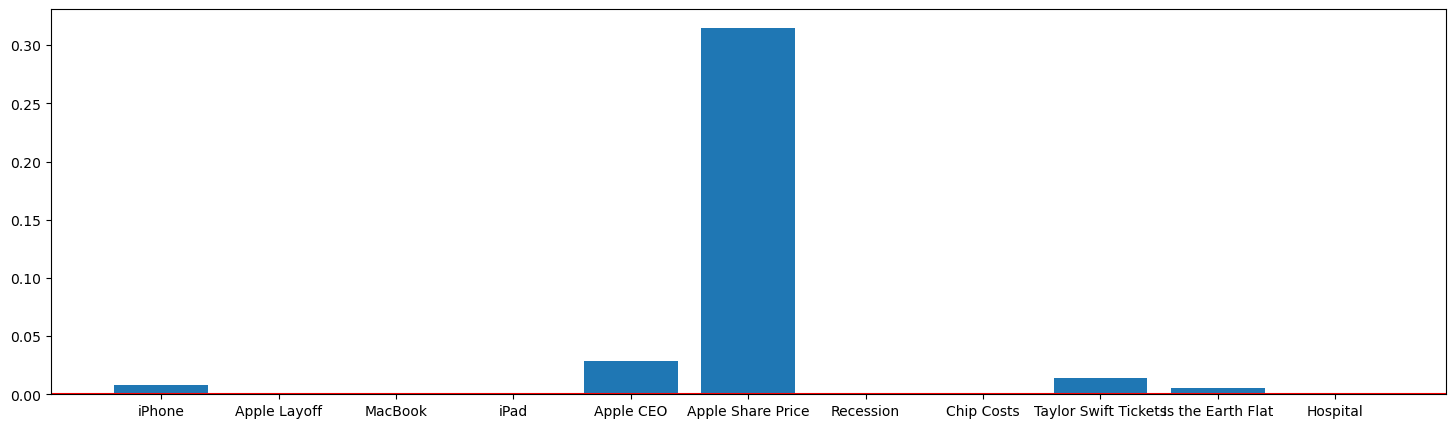

In [19]:
plt.figure(figsize=(18,5))
plt.bar(range(len(coefficients)),coefficients,tick_label = X.columns)
plt.axhline(0.,color="red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

Yes, the magnitudes of the coefficients shown in the bar chart are contextually appropriate. The "Apple Share Price" coefficient is significantly higher, indicating a very strong correlation between the search interest for Apple's share price and its earnings per share (EPS). This correlation is logical as the company's financial performance has a substantial impact on its share price.

Other Apple-related terms like "iPhone," "MacBook," and "iPad" exhibit smaller yet positive coefficients, ranging from 0.19 to 0.34, suggesting a weaker but still significant relevance to EPS. The term "recession" shows a small negative coefficient, implying that an increased search interest in recession might inversely relate to Apple's EPS. This could mean that heightened recession concerns might correspond with a decrease in Apple's EPS.

Contrastingly, unrelated terms such as "Taylor Swift Tickets," "Is the Earth Flat," and "Hospital" have coefficients near zero, aligning with the expectation that these terms lack predictive power regarding Apple’s financial performance.